# 3: A Data Science campaign with pandas and PCA
This notebook covers:
* Essential data wrangling with `pandas`;
* Working with different data types;
* Discerning categorical from numerical features;
* Spotting and interpreting the PCA 'variance bug';
* Working with a public data set.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Essential Python tools and concepts – `pandas`

In this practical we will predominantly be working with the `pandas` library. 


In [2]:
import numpy as np
import pandas as pd

### Pandas Series

A Series is a one-dimensional list of values. 

Note the `NaN` value - it means "Not a Number". Originally this represents an undefined numerical, like the result of a division by zero. It is often used to denote missing values. 

In [3]:
values =[1, 3, 5, np.nan, 6, 8] # a list of values
pd.Series(values)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

It can have an index associated with each value. 

In [4]:
s = pd.Series(values, index=['a', 'b', 'c', 'd', 'e', 'f'])
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

####  Task
Add a letter to the index. What happens? How do you need to change the values list to fix the error?

In [5]:
values =[1, 3, 5, np.nan, 6, 8, 8] # a list of values
s = pd.Series(values, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
g    8.0
dtype: float64

**Task 1:** Create a series of values 10,12,14,..20 with the indicies from 0 to 5
Save it in the variable called *mySeries*

In [6]:
myValues = np.arange(10,20,2)
#The standard for indicies is starting at 0, meaning we don't need to do anything, but we could have used arange to create some.
mySeries = pd.Series(myValues)
mySeries

0    10
1    12
2    14
3    16
4    18
dtype: int32

### Pandas Data Frames
A **data frame** is like a two-dimensional series.

In [7]:
df = pd.DataFrame(np.random.randn(6,4)) # note the size: 6 rows, 4 columns
df

,0,1,2,3
0,2.467719,0.773649,-1.253810,1.047839
1,0.394820,0.432300,-0.415233,-0.597875
2,1.151715,-1.984530,0.605845,0.473475
3,0.608775,1.084740,0.718023,0.173279
4,-1.706077,0.394773,0.066250,0.072660
5,-1.449372,2.090929,-0.211965,0.014212


You can pass it an index during construction:

In [8]:
df = pd.DataFrame(np.random.randn(6,4), 
                  index=["row {}".format(i) for i in range(6)]) # note the size: 6 rows, 4 columns
df

,0,1,2,3
row 0,1.172767,0.610907,1.233259,0.092163
row 1,0.119560,0.582449,-0.387290,-0.537276
row 2,0.086969,0.259815,1.267376,-0.579447
row 3,-0.066721,0.886924,0.731418,-0.282958
row 4,1.145979,0.457504,0.075966,-0.416273
row 5,0.650397,-1.152739,0.308668,0.749439


Likewise, you can pass column names:

In [9]:
df = pd.DataFrame(np.random.randn(6,4), 
                  index=["row {}".format(i) for i in range(6)],
                  columns=['col {}'.format(i) for i in range(4)]) 
df

,col 0,col 1,col 2,col 3
row 0,-0.846906,0.160227,-0.693557,0.092744
row 1,-0.746476,0.031033,-0.696315,1.028980
row 2,-0.839200,-1.729893,-0.785536,1.526979
row 3,0.081708,0.599040,1.714003,-0.413679
row 4,0.030160,0.986489,-1.415710,0.377733
row 5,1.220254,0.613177,0.055264,0.851263


You can also construct it from a dictionary:

In [10]:
columns = {'beep': np.random.randn(6),
           'bop': np.random.randn(6),
           'bup': np.random.randn(6),
           'bap': np.random.randn(6)}
df = pd.DataFrame(columns, index=["row {}".format(i) for i in range(6)])
df

,beep,bop,bup,bap
row 0,2.197033,1.386067,0.734918,-1.290522
row 1,1.205623,-1.256799,-0.222595,-0.739938
row 2,0.297515,1.452876,-0.486589,2.199202
row 3,-0.170145,-0.653131,-0.078989,-0.889768
row 4,1.651369,-0.601845,0.877210,-1.465946
row 5,-1.074391,-0.567088,-0.133709,-0.500173


### Data frame addressing
We can now address parts of the data by their row and column names. Columns are addressed like this:

In [11]:
df['bop']

row 0    1.386067
row 1   -1.256799
row 2    1.452876
row 3   -0.653131
row 4   -0.601845
row 5   -0.567088
Name: bop, dtype: float64

Note that the return value type is a Series, not like a Data Frame! This is because it's one-dimensional.

Extract multiple columns at once by passing a list of column names. Does not need to be unique!

In [12]:
df[['bop', 'bap', 'bap', 'bap']]

,bop,bap,bap,bap
row 0,1.386067,-1.290522,-1.290522,-1.290522
row 1,-1.256799,-0.739938,-0.739938,-0.739938
row 2,1.452876,2.199202,2.199202,2.199202
row 3,-0.653131,-0.889768,-0.889768,-0.889768
row 4,-0.601845,-1.465946,-1.465946,-1.465946
row 5,-0.567088,-0.500173,-0.500173,-0.500173


Here, the return value is a DataFrame because it's two-dimensional.

Rows use the `.loc` attribute:

In [13]:
df.loc[['row 0', 'row 2']]

,beep,bop,bup,bap
row 0,2.197033,1.386067,0.734918,-1.290522
row 2,0.297515,1.452876,-0.486589,2.199202


The `.iloc` attribute will allow you to specify the number of the row, instead of its label:

In [14]:
df.iloc[0]

beep    2.197033
bop     1.386067
bup     0.734918
bap    -1.290522
Name: row 0, dtype: float64

It can also use numpy-style addressing for the value matrix:

In [15]:
df.iloc[2,1:4]

bop    1.452876
bup   -0.486589
bap    2.199202
Name: row 2, dtype: float64

In [16]:
df.iloc[1:3,0:2]

,beep,bop
row 1,1.205623,-1.256799
row 2,0.297515,1.452876


### Advanced data frames

Pandas supports all kinds of data types. A data frame can hold all sorts of data types at the same time. This is the principal difference to a `numpy.array`, where all elements need to be of the same data type.

In [17]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The `info()` function gives you an overview of the data types:

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 260.0+ bytes


This is all the `pandas` you'll need in this practical. Feel free to make yourself familiar with what else `pandas` has to offer. A good starting point is [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) in the official `pandas` documentation.

# Data campaign: Cars 
You now know (almost) all you need to know to start your first data science campaign. We will analyse the "cars" data set. It contains data on historic car models. You will be guided through the first steps, then it's up to you to apply PCA to explore the data. 

Let's load the data from the internet and make a data frame:

In [19]:
# use read_csv to read data from url 
# use set_index to set index 'model" 
# show dataframe.

cars = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
cars = cars.set_index('model')
cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


### Descriptive statistics


Let's have a quick look at some descriptive statistics.

In [20]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [21]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

#### Task
What do you notice about the variance?

There's also a command that gives you a few common statistical descriptors, all in one data frame. Up to you to decide which you like better!

In [22]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [23]:
pd.DataFrame.drop?

## Numerical vs. categorical features
**Numerical features** express a quantitative relationship between an instance and a feature. For example, 'height' is a numerical feature of a human. 

**Categorical features** express whether an instance belongs in a certain category. 'Male', 'female' are two categories that apply to humans (alongside others).

Most interesting data sets contain numerical **and** categorical features.

For PCA, only numerical features are useful (most of the time). 

These are the features of the cars dataset:
* mpg: Miles per (US) gallon
* cyl: Number of cylinders
* disp: Displacement (cubic inches)
* hp: Gross horsepower
* drat: Rear axle ratio
* wt: Weight (1000 lbs)
* qsec: 1/4 mile time
* vs: V-engine (0) or straight engine (1)
* am: Transmission (0 = automatic, 1 = manual)
* gear: Number of forward gears
* carb: Number of carburators


### **Task: remove categorical features** 
1. Decide which features are categorical, which are numerical. Search the internet if you don't know what a certain feature means.  
2. Delete categorical features from the data frame. Use the `.drop()` function. Documentation is available [online](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) or with the built-in documentation accessed by typing `pd.DataFrame.drop?` in a cell and executing it. 

In [24]:
cars_num = cars.drop(['vs','am'], axis=1)
cars_num

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
model,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,4,2


### Task: Analyse the cleaned data set using PCA

1. Do a pca on the raw data.
2. Produce a scatter plot of the PCA'd data.
2. Produce a scree plot and analyse how much variance is captured in the first 2 components.
3. Plot the covariance matrix of the dataset. What stands out? 
3. Look at the components of the dataset. Which features are highly represented in the first two components?

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
vals = cars_num.values
pca.fit(vals)
cars_pca = pca.transform(vals)

Text(0, 0.5, 'PC 2')

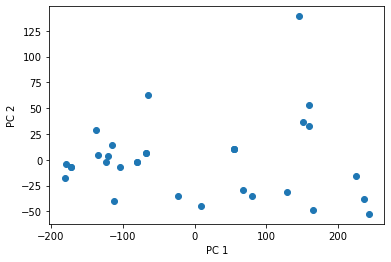

In [26]:
ax = plt.gca()
ax.scatter(cars_pca[:,0], cars_pca[:,1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

<ipython-input-27-fffaec7fdd1e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(range(0,10))


0.9270115700107461

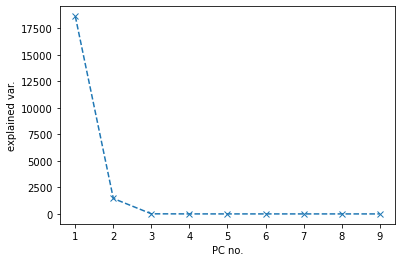

In [27]:
ax = plt.gca()
ax.plot(pca.explained_variance_, marker='x', linestyle='--')
ax.set_xlabel('PC no.')
ax.set_ylabel('explained var.')
_ = ax.set_xticklabels(range(0,10))

allVariance = np.sum(pca.explained_variance_)
PC1 = pca.explained_variance_[0] / allVariance
PC1

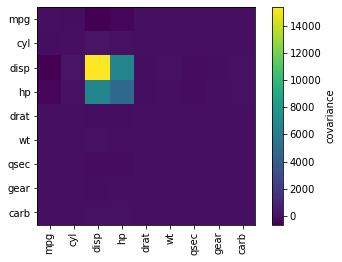

In [28]:
ax = plt.gca()
img = ax.imshow(pca.get_covariance())
plt.colorbar(img, label='covariance')
ax.set_yticks(range(0,9))
_ = ax.set_yticklabels(cars_num.columns)
ax.set_xticks(range(0,9))
_ = ax.set_xticklabels(cars_num.columns, rotation=90)

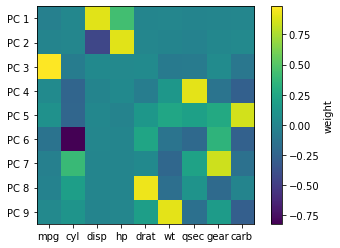

In [29]:
ax = plt.gca()
img = ax.imshow(pca.components_)
plt.colorbar(img, label='weight')
ax.set_xticks(range(0,9))
_ = ax.set_xticklabels(cars_num.columns)
ax.set_yticks(range(0,9))
_ = ax.set_yticklabels(['PC {}'.format(i) for i in range(1, 10)])

Text(0, 0.5, 'hp')

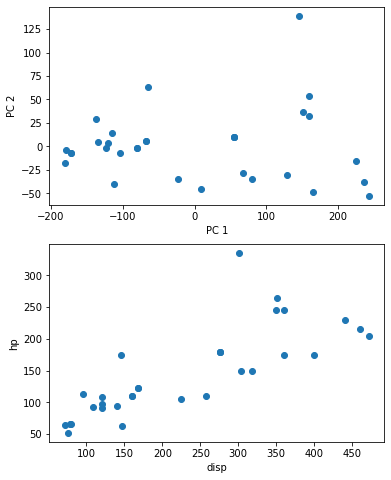

In [30]:
f = plt.figure(figsize=(6,8))
ax = f.add_subplot(2,1,1)
ax = plt.gca()
ax.scatter(cars_pca[:,0], cars_pca[:,1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax = f.add_subplot(2,1,2)
ax = plt.gca()
ax.scatter(cars['disp'], cars['hp'])
ax.set_xlabel('disp')
ax.set_ylabel('hp')


### Task: Normalise and observe the effect (the *variance bug*)
1. Normalise the data to zero mean and unit variance and repeat the steps above. 
5. How does the scatter plot of the first two PCs compare to the PCA on the raw data before normalisation? 
6. What's the difference in the scree plot?
7. How is the covariance matrix different?
7. How do components differ? 
8. *(Advanced)* Spot a cluster in the plotted data, find the corresponding data points, figure out what they have in common.

In [31]:
from sklearn.preprocessing import StandardScaler as ST
vals = cars_num.values
st = ST()
st.fit(vals)
vals_norm = st.transform(vals)
pca = PCA()
pca.fit(vals_norm)
cars_pca = pca.transform(vals_norm)

Text(0, 0.5, 'PC 2')

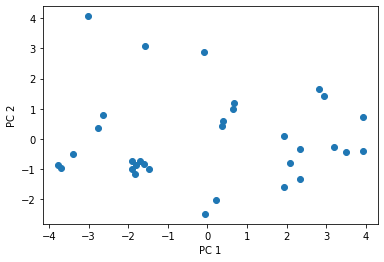

In [32]:
ax = plt.gca()
ax.scatter(cars_pca[:,0], cars_pca[:,1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

<ipython-input-33-fffaec7fdd1e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(range(0,10))


0.6284377193447805

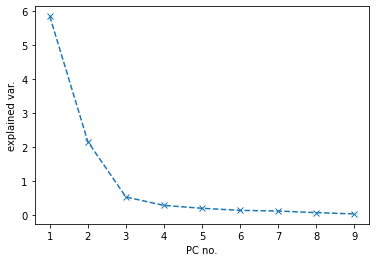

In [33]:
ax = plt.gca()
ax.plot(pca.explained_variance_, marker='x', linestyle='--')
ax.set_xlabel('PC no.')
ax.set_ylabel('explained var.')
_ = ax.set_xticklabels(range(0,10))

allVariance = np.sum(pca.explained_variance_)
PC1 = pca.explained_variance_[0] / allVariance
PC1

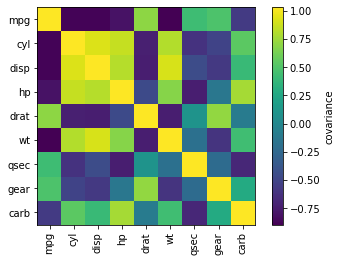

In [34]:
ax = plt.gca()
img = ax.imshow(pca.get_covariance())
plt.colorbar(img, label='covariance')
ax.set_yticks(range(0,9))
_ = ax.set_yticklabels(cars_num.columns)
ax.set_xticks(range(0,9))
_ = ax.set_xticklabels(cars_num.columns, rotation=90)

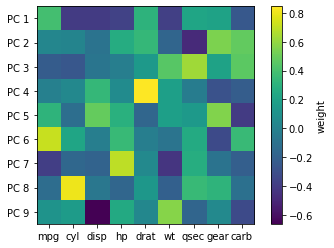

In [35]:
ax = plt.gca()
img = ax.imshow(pca.components_)
plt.colorbar(img, label='weight')
ax.set_xticks(range(0,9))
_ = ax.set_xticklabels(cars_num.columns)
ax.set_yticks(range(0,9))
_ = ax.set_yticklabels(['PC {}'.format(i) for i in range(1, 10)])

# Coronavirus epidemic dynamics

### Task: Explore data on kaggle.com
1. Go to the website on the kaggle site: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset 
2. Inspect the data on the website and the various ways the site lets you explore it. Registration on the website is not necessary.



## Working with the Coronavirus outbreak data
1. The coronavirus dataset is provided on [canvas](https://herts.instructure.com/courses/60076/modules). Download and save it in the same folder as this notebook, on your U: drive.
2. Unzip the data.
3. Verify that the folder in which this notebook resides should now contain a sub-folder named `novel-corona-virus-2019-dataset`

First we load the main dataset into a DataFrame:

In [36]:
df = pd.read_csv('novel-corona-virus-2019-dataset/2019_nCoV_data.csv')
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0


If this fails then please check again whether the dataset folder is unzipped and resides in the same folder as this notebook. Check that the filename in the command matches the filename of the data set on disk.

The `Sno` column contains the serial number and is identical with the aut-generated index column. let's set the Index to track the `Sno` column:

In [37]:
df = df.set_index('Sno')
df 

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0


Let's explore the data types.

### Task: 
Which features are numeric? Which are continuous? Which are categorical?

## Initial exploration
Let's plot the number of number of confirmed cases for the whole data set.

<AxesSubplot:xlabel='Sno'>

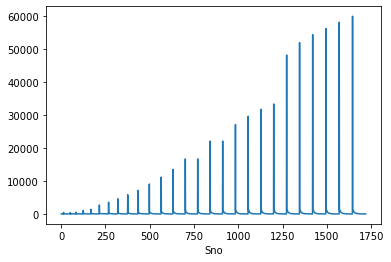

In [38]:
df['Confirmed'].plot()

### Task

Is this the plot you expected? Why not? 

Solution: The above command naively plots the whole column, but ignores the structure of the data set, where each line applies to a different province/state, or even country.

We need to filter by country! Let's look only at the Hubei province, the root of the outbreak:

In [39]:
df.loc[df['Province/State'] == 'Hubei']

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
14,01/22/2020 12:00:00,Hubei,China,01/22/2020 12:00:00,444.0,0.0,0.0
52,01/23/2020 12:00:00,Hubei,Mainland China,01/23/2020 12:00:00,444.0,17.0,28.0
84,01/24/2020 12:00:00,Hubei,Mainland China,01/24/2020 12:00:00,549.0,24.0,31.0
125,01/25/2020 22:00:00,Hubei,Mainland China,01/25/2020 22:00:00,1052.0,52.0,42.0
169,01/26/2020 23:00:00,Hubei,Mainland China,01/26/2020 23:00:00,1423.0,76.0,44.0
216,01/27/2020 20:30:00,Hubei,Mainland China,01/27/2020 20:30:00,2714.0,100.0,47.0
268,01/28/2020 23:00:00,Hubei,Mainland China,01/28/2020 23:00:00,3554.0,125.0,80.0
320,01/29/2020 21:00:00,Hubei,Mainland China,01/29/2020 21:00:00,4586.0,162.0,90.0
376,01/30/2020 21:30:00,Hubei,Mainland China,01/30/2020 21:30:00,5806.0,204.0,116.0


That looks better! Let's plot those values:

<AxesSubplot:xlabel='Sno'>

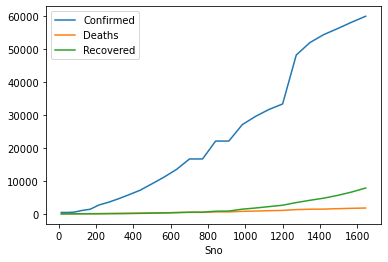

In [40]:
df.loc[df['Province/State'] == 'Hubei'].plot()

Note how the `.plot()` function of the `DataFrame` object already gives us a plot of all numerical features, complete with a legend!

The plot is still lackiong though; It needs for example:
* Dates on the x-axis
* proper labels on the y-axis

### Task (advanced)
* Read the documentation of the `DataFrame.plot` command to learn how to make it plot the date on the x-axis.
* use the `ax = gca()` method the get an axis object, and call the `set_ylabel()` method to set an appropriate y-label.

### Task (advanced)
* Plot the data for all of China.
* Aggregate the data for the rest of the world and plot it.

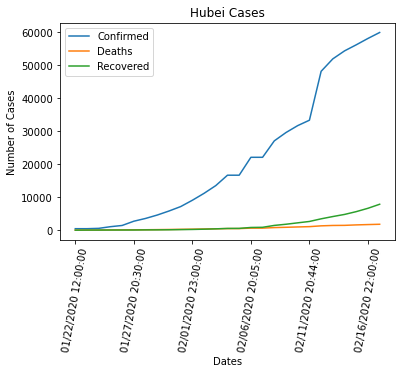

In [54]:
df.loc[df['Province/State'] == 'Hubei'].plot(x='Date')
ax = plt.gca()
ax.set_title("Hubei Cases")
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Dates')
_ = plt.xticks(rotation=80) # _ suppresses output, remove the "_ ="" to see why this was done here. plt.show() is often used as the last line for this very reason

In [49]:
world = df.groupby('Date').sum()
world

,Confirmed,Deaths,Recovered
Date,,,
01/22/2020 12:00:00,555.0,0.0,0.0
01/23/2020 12:00:00,653.0,18.0,30.0
01/24/2020 12:00:00,941.0,26.0,36.0
01/25/2020 22:00:00,2019.0,56.0,49.0
01/26/2020 23:00:00,2794.0,80.0,54.0
01/27/2020 20:30:00,4473.0,107.0,63.0
01/28/2020 23:00:00,6057.0,132.0,110.0
01/29/2020 21:00:00,7783.0,170.0,133.0
01/30/2020 21:30:00,9776.0,213.0,187.0


Here we plot a bit differently, just to show variation. Instead of using the panda wrapper for plotting we can also invoke plt directly. Means a bit more work :)


Text(0.5, 17.19999999999999, 'Dates')

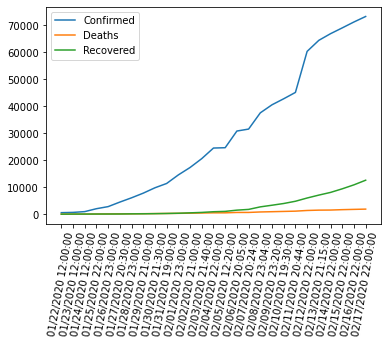

In [53]:
plt.plot(world)
plt.legend(world.columns.values[0:3])
ax.set_title("World Cases")
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Dates')
_ = plt.xticks(rotation=80)

Looks a bit similar?

Let's see!

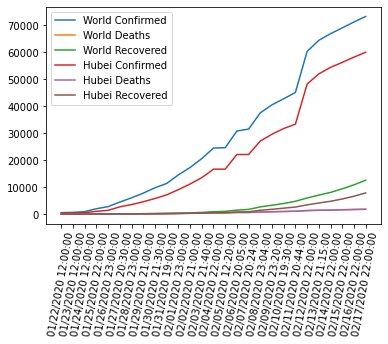

In [55]:
plt.plot(world)
hubei = df.loc[df['Province/State'] == 'Hubei']
hubei = hubei.groupby('Date').sum()
plt.plot(hubei)
ax.set_title("World Cases")
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Dates')
plt.legend(["World Confirmed", "World Deaths","World Recovered","Hubei Confirmed","Hubei Deaths","Hubei Recovered"])
plt.xticks(rotation=80)
plt.show()

## That's it for today!
We have covered have learnt:
* Essential `pandas`; how to create, address and modify `pandas` `DataFrame`s.
* How to perform a data science campaign using PCA.
* Initial loading and ploting of time-series data.

